# La Crime Analyzer

### Import librerie

In [157]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import folium

### Creo una classe CrimeAnalyzer

In [158]:
%%python   
class CrimeAnalyzer:
        def __init__(self, url, path, report_path):
            self.url = url
            self.path = path
            self.report_path = report_path
            self.crimes = None

## Definisco i vari metodi

### Funzione che scarica il file csv con requests

In [159]:
%%python
class CrimeAnalyzer:    
    def download_csv(self):
        response = requests.get(self.url) # Invio richiesta al server
        lines = response.text.strip().split('\n') # Prendo la risposta del server e la sostituisco da stringa a lista
        data = csv.reader(lines) # Creo un oggetto csv che legge la lista
            
        # Apro il file in scrittura
        with open(self.path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(data)

### Creiamo il dataframe

In [160]:
%%python

class CrimeAnalyzer:    
    def read_data(self):
        self.crimes = pd.read_csv(self.path)

### Puliamo i dati

In [161]:
%%python
class CrimeAnalyzer:   
    def clean_data(self):
        self.crimes = self.crimes[self.crimes['Vict Age'] != 0]
        self.crimes['Vict Sex'] = self.crimes['Vict Sex'].replace(['H', 'X'], 'Other')

### Esploriamo il Dataframe

In [162]:
%%python
class CrimeAnalyzer:  
    def print_data_info(self):
        print(self.crimes.head())
        print(self.crimes.columns)
        print(self.crimes.shape)
        print(self.crimes.dtypes)

### Mostriamo i tipi di crimini più frequenti

In [163]:
%%python
class CrimeAnalyzer:   
    def analyze_crime_frequency(self):
        print("Crime Frequency")
        crime_frequency = self.crimes['Crm Cd Desc'].value_counts()
        print(crime_frequency)

### Analisi temporale dei crimini

In [164]:
%%python
class CrimeAnalyzer:
    def analyze_temporal_data(self):
        self.crimes['Date Rptd'] = pd.to_datetime(self.crimes['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
        self.crimes['Month'] = self.crimes['Date Rptd'].dt.month
        monthly_crime_count = self.crimes['Month'].value_counts().sort_index()
            
        # Uso una list comprehension per trasformare i mesi da numeri a string
        month_names = [calendar.month_name[i] for i in range(1, 13)] 
        monthly_crime_count.index = month_names

        monthly_crime_count.plot(kind='bar', xlabel='Month', ylabel='Number of Crimes')
        plt.show()

### Analisi demografica sulle vittime

In [165]:
%%python
class CrimeAnalyzer:
    def analyze_victim_demographics(self):
        victim_age_distribution = self.crimes['Vict Age'].plot.hist(bins=20)
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.title('Distribution of Victim Ages')
        plt.show()
        
        victim_gender_distribution = self.crimes['Vict Sex'].value_counts()
        labels = victim_gender_distribution.index
        counts = victim_gender_distribution.values
        plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Distribution of Crime Victims by Gender')
        plt.show()

### Analisi sullo stato dei crimini (In corso/Arresto/Altro)

In [166]:
%%python
class CrimeAnalyzer:
    def analyze_crime_status(self):
        crime_status_distribution = self.crimes['Status Desc'].value_counts()
        print(crime_status_distribution)

### Analisi contestuale

In [167]:
%%python
class CrimeAnalyzer:
    def analyze_premise_and_weapon(self):
        premise_distribution = self.crimes['Premis Desc'].value_counts()
        print(premise_distribution)
        weapon_distribution = self.crimes['Weapon Desc'].value_counts()
        print(weapon_distribution)

### Analisi età media in base alla tipologia di crimine

In [168]:
%%python
class CrimeAnalyzer:
    def analyze_crime_vs_age(self):
        crime_vs_age = self.crimes.groupby('Crm Cd Desc')['Vict Age'].mean()
        print(crime_vs_age)

### Analisi geografica

In [169]:
%%python
class CrimeAnalyzer:
    def plot_crime_map(self):
            
            # Filtriamo le righe con valori mancanti per la latitudine e la longitudine
            locations = self.crimes[['LAT', 'LON']].dropna()

            # Scegliamo un sottoinsieme di 100 righe
            subset = locations.head(100)

            # Creiamo una mappa centrata su Los Angeles
            crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=13)

            # Aggiungiamo i punti alla mappa
            for _, crime in subset.iterrows():
                lat, lon = crime['LAT'], crime['LON']
                folium.Marker(location=[lat, lon]).add_to(crime_map)

            # Salviamo la mappa come file html
            crime_map.save('data/crime_map.html')

### Creazione file di report

In [170]:
%%python
class CrimeAnalyzer: 
    def report_file(self):
            
            #impostazione di visualizzazione massima righe
            pd.set_option('display.max_rows', None)
            
            report_data = {
                'Victim Gender Distribution': self.crimes['Vict Sex'].value_counts(),
                'Crime Status Distribution': self.crimes['Status Desc'].value_counts(),
                'Premise Distribution': self.crimes['Premis Desc'].value_counts(),
                'Weapon Distribution': self.crimes['Weapon Desc'].value_counts(),
                'Weapon Distribution': self.crimes['Weapon Desc'].value_counts()
            }

            with open(self.report_path, 'w') as file:
                for section, data in report_data.items():
                    file.write(f'{section}:\n')
                    file.write(f'{data}\n\n')

            print(f"Creato il file di report: {self.report_path}")

### Richiamiamo tutti i metodi per elaborare i dati

In [171]:
%%python
class CrimeAnalyzer:
    def process_data(self):
        self.download_csv()
        self.read_data()
        self.clean_data()
        self.print_data_info()
        self.analyze_crime_frequency()
        self.analyze_temporal_data()
        self.analyze_victim_demographics()
        self.analyze_crime_status()
        self.analyze_premise_and_weapon()
        self.analyze_crime_vs_age()
        self.analyze_victim_gender_distribution()
        self.plot_crime_map()
        self.report_file()

## Classe completa

In [172]:
class CrimeAnalyzer:
    # Definisco il costruttore
    def __init__(self, url, path, report_path):
        self.url = url
        self.path = path
        self.report_path = report_path
        self.crimes = None
        
    # Definisco i metodi
    
    def download_csv(self):
        response = requests.get(self.url) # Invio richiesta al server
        lines = response.text.strip().split('\n') # Prendo la risposta del server e la sostituisco da stringa a lista
        data = csv.reader(lines) # Creo un oggetto csv che legge la lista
        
        # Apro il file in scrittura
        with open(self.path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(data)

    def read_data(self):
        self.crimes = pd.read_csv(self.path)

    # Pulisco i dati
    def clean_data(self):
        self.crimes = self.crimes[self.crimes['Vict Age'] != 0]
        self.crimes['Vict Sex'] = self.crimes['Vict Sex'].replace(['H', 'X'], 'Other')

    # Stampo le informazioni del Dataframe
    def print_data_info(self):
        print(self.crimes.head())
        print(self.crimes.columns)
        print(self.crimes.shape)
        print(self.crimes.dtypes)

    def analyze_crime_frequency(self):
        print("Crime Frequency")
        crime_frequency = self.crimes['Crm Cd Desc'].value_counts()
        print(crime_frequency)

    def analyze_temporal_data(self):
        self.crimes['Date Rptd'] = pd.to_datetime(self.crimes['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
        self.crimes['Month'] = self.crimes['Date Rptd'].dt.month
        monthly_crime_count = self.crimes['Month'].value_counts().sort_index()
        
        # Uso una list comprehension per trasformare i mesi da numeri a string
        month_names = [calendar.month_name[i] for i in range(1, 13)] 
        monthly_crime_count.index = month_names

        monthly_crime_count.plot(kind='bar', xlabel='Month', ylabel='Number of Crimes')
        plt.show()

    def analyze_victim_demographics(self):
        victim_age_distribution = self.crimes['Vict Age'].plot.hist(bins=20)
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.title('Distribution of Victim Ages')
        plt.show()

        victim_gender_distribution = self.crimes['Vict Sex'].value_counts()
        print(victim_gender_distribution)

    def analyze_crime_status(self):
        crime_status_distribution = self.crimes['Status Desc'].value_counts()
        print(crime_status_distribution)

    def analyze_premise_and_weapon(self):
        premise_distribution = self.crimes['Premis Desc'].value_counts()
        print(premise_distribution)

        weapon_distribution = self.crimes['Weapon Desc'].value_counts()
        print(weapon_distribution)

    def analyze_crime_vs_age(self):
        crime_vs_age = self.crimes.groupby('Crm Cd Desc')['Vict Age'].mean()
        print(crime_vs_age)

    def analyze_victim_gender_distribution(self):
        sex_counts = self.crimes['Vict Sex'].value_counts()

        labels = sex_counts.index
        counts = sex_counts.values

        plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Distribution of Crime Victims by Gender')
        plt.show()
        
        
    def plot_crime_map(self):
        
        # Filtriamo le righe con valori mancanti per la latitudine e la longitudine
        locations = self.crimes[['LAT', 'LON']].dropna()

        # Scegliamo un sottoinsieme di 100 righe
        subset = locations.head(100)

        # Creiamo una mappa centrata su Los Angeles
        crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=13)

        # Aggiungiamo i punti alla mappa
        for _, crime in subset.iterrows():
            lat, lon = crime['LAT'], crime['LON']
            folium.Marker(location=[lat, lon]).add_to(crime_map)

        # Salviamo la mappa come file html
        crime_map.save('data/crime_map.html')

    def report_file(self):
        
        #impostazione di visualizzazione massima righe
        pd.set_option('display.max_rows', None)
        
        report_data = {
            'Victim Gender Distribution': self.crimes['Vict Sex'].value_counts(),
            'Crime Status Distribution': self.crimes['Status Desc'].value_counts(),
            'Premise Distribution': self.crimes['Premis Desc'].value_counts(),
            'Weapon Distribution': self.crimes['Weapon Desc'].value_counts()
        }

        with open(self.report_path, 'w') as file:
            for section, data in report_data.items():
                file.write(f'{section}:\n')
                file.write(f'{data}\n\n')

        print(f"Creato il file di report: {self.report_path}")

    
    # Richiamiamo i metodi per elaborare i dati
    def process_data(self):
        self.download_csv()
        self.read_data()
        self.clean_data()
        self.print_data_info()
        self.analyze_crime_frequency()
        self.analyze_temporal_data()
        self.analyze_victim_demographics()
        self.analyze_crime_status()
        self.analyze_premise_and_weapon()
        self.analyze_crime_vs_age()
        self.analyze_victim_gender_distribution()
        self.plot_crime_map()
        self.report_file()

### Istanziamo la classe CrimeAnalyzer

In [173]:
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
path = 'data/crimes.csv'
report_path = 'data/crime_report.txt'
analyzer = CrimeAnalyzer(url, path, report_path)
# analyzer.process_data()

## Richiamiamo i metodi

In [174]:
analyzer.download_csv()

In [175]:
analyzer.read_data()

In [176]:
analyzer.clean_data()

In [177]:
analyzer.print_data_info()

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   
5  200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30     1   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   
5      Central          163         1     121   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...     

In [178]:
analyzer.analyze_crime_frequency()

Crime Frequency
BATTERY - SIMPLE ASSAULT                                    58507
THEFT OF IDENTITY                                           47524
BURGLARY FROM VEHICLE                                       44909
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              41249
INTIMATE PARTNER - SIMPLE ASSAULT                           37347
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     34611
THEFT PLAIN - PETTY ($950 & UNDER)                          33257
BURGLARY                                                    31186
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         26096
ROBBERY                                                     20667
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    19508
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    16376
CRIMINAL THREATS - NO WEAPON DISPLAYED                      15059
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             13278
BRANDISH WEAPON                                             

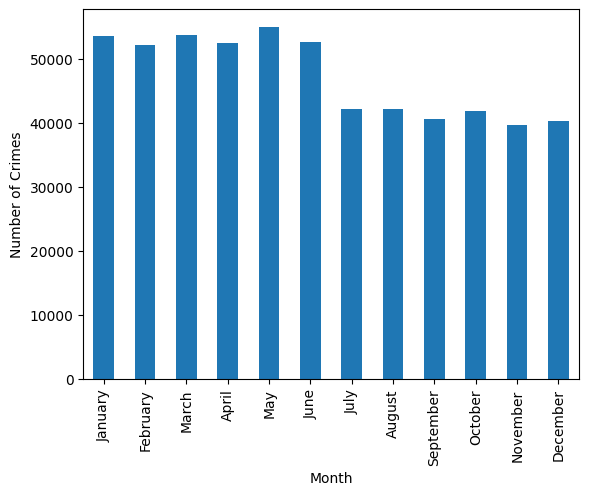

In [179]:
analyzer.analyze_temporal_data()

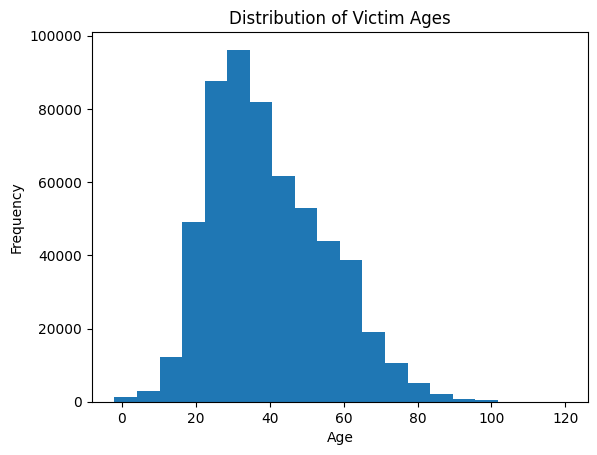

M        285506
F        273602
Other      6875
Name: Vict Sex, dtype: int64


In [180]:
analyzer.analyze_victim_demographics()

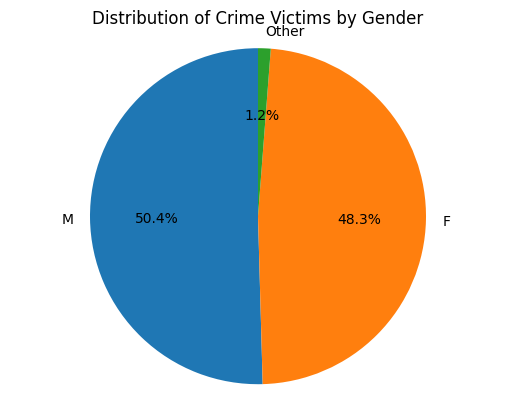

In [186]:
analyzer.analyze_victim_gender_distribution()

In [181]:
analyzer.analyze_crime_status()

Invest Cont     437568
Adult Other      74036
Adult Arrest     51481
Juv Arrest        1852
Juv Other         1072
UNK                  3
Name: Status Desc, dtype: int64


In [182]:
analyzer.analyze_premise_and_weapon()

SINGLE FAMILY DWELLING                                             124697
STREET                                                             104103
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)                        87700
PARKING LOT                                                         36578
SIDEWALK                                                            30308
VEHICLE, PASSENGER/TRUCK                                            21203
OTHER BUSINESS                                                      17600
GARAGE/CARPORT                                                      11563
DRIVEWAY                                                             9056
PARKING UNDERGROUND/BUILDING                                         5963
RESTAURANT/FAST FOOD                                                 5367
OTHER RESIDENCE                                                      4772
OTHER PREMISE                                                        4667
ALLEY                                 

In [183]:
analyzer.analyze_crime_vs_age()

Crm Cd Desc
ARSON                                                       45.198653
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                31.816514
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              38.037286
ATTEMPTED ROBBERY                                           39.044010
BATTERY - SIMPLE ASSAULT                                    40.652691
BATTERY ON A FIREFIGHTER                                    36.686567
BATTERY POLICE (SIMPLE)                                     31.551601
BATTERY WITH SEXUAL CONTACT                                 31.083308
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM    42.250000
BIGAMY                                                      34.333333
BIKE - ATTEMPTED STOLEN                                     46.200000
BIKE - STOLEN                                               36.113335
BLOCKING DOOR INDUCTION CENTER                              57.600000
BOMB SCARE                                                  37.452632
BRANDISH

In [184]:
analyzer.plot_crime_map()

In [185]:
analyzer.report_file()

Creato il file di report: data/crime_report.txt
